In [1]:
# Importing Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import random

In [2]:
df = pd.read_csv('day.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


Checking Null and general info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data Cleaning + Converting variables to analyzable Datatypes and Catergory variables

In [5]:
df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1) # Dropping columns which are recurring or not of use
df.shape

(730, 12)

In [6]:
season_map = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
df['season'] = df['season'].map(season_map)
df['season']

0      spring
1      spring
2      spring
3      spring
4      spring
        ...  
725    spring
726    spring
727    spring
728    spring
729    spring
Name: season, Length: 730, dtype: object

In [7]:
weekday_map = {0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}
df['weekday'] = df['weekday'].map(weekday_map)
df['weekday']

0      sat
1      sun
2      mon
3      tue
4      wed
      ... 
725    thu
726    fri
727    sat
728    sun
729    mon
Name: weekday, Length: 730, dtype: object

In [8]:
weathersit_map = {1: 'clear', 2: 'cloudy', 3: 'slightsnow/rain', 4: 'heavysnow/rain'}
df['weathersit'] = df['weathersit'].map(weathersit_map)
df['weathersit']

0      cloudy
1      cloudy
2       clear
3       clear
4       clear
        ...  
725    cloudy
726    cloudy
727    cloudy
728     clear
729    cloudy
Name: weathersit, Length: 730, dtype: object

In [9]:
month_map = {1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'}
df['mnth'] = df['mnth'].map(month_map)
df['mnth']


0      jan
1      jan
2      jan
3      jan
4      jan
      ... 
725    dec
726    dec
727    dec
728    dec
729    dec
Name: mnth, Length: 730, dtype: object

#### EDA

1. Univariate Analysis

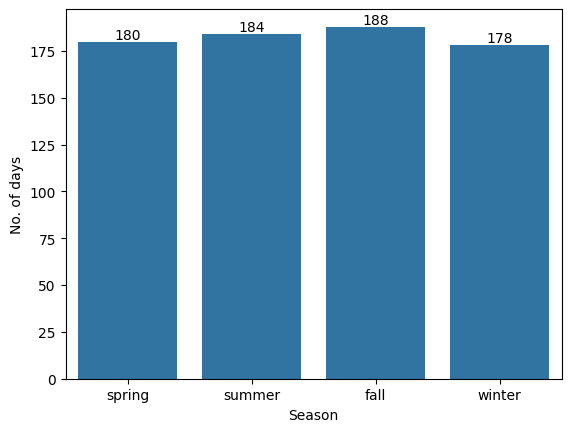

In [10]:
ax = sns.countplot(df, x=df['season'])
ax.bar_label(ax.containers[0]) 
plt.xlabel('Season')
plt.ylabel('No. of days')
plt.show()

# Observations:
# 1. Distribution of No. of records or days seems to be around the same range in the data set - Most being in fall season

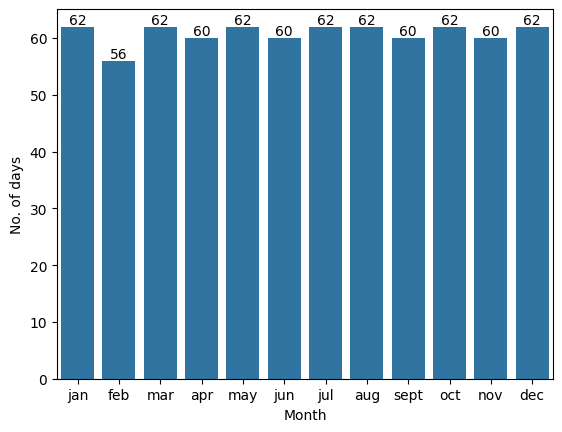

In [11]:
ax = sns.countplot(df, x=df['mnth'])
ax.bar_label(ax.containers[0]) 
plt.xlabel('Month')
plt.ylabel('No. of days')
plt.show()

# Observations:
# 1. Distribution of No. of records or days seems to be around the same range in the data set => obviously because data set covers all dates of 2018 and 2019


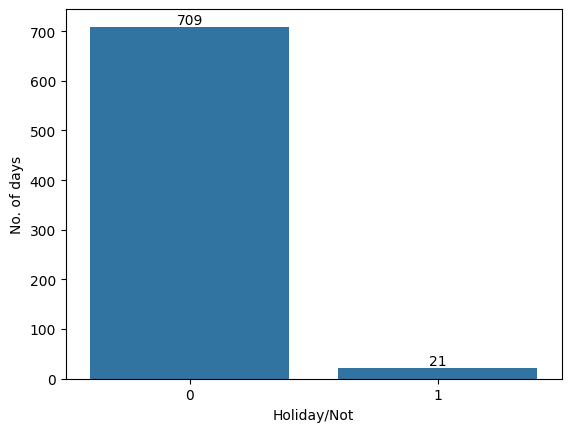

In [12]:
ax = sns.countplot(df, x=df['holiday'])
ax.bar_label(ax.containers[0]) 
plt.xlabel('Holiday/Not')
plt.ylabel('No. of days')
plt.show()

# Observations:
# 1. No. of holidays in the span of 2018 and 2019 is 21 - doesn't consider Saturday/Sunday as holiday

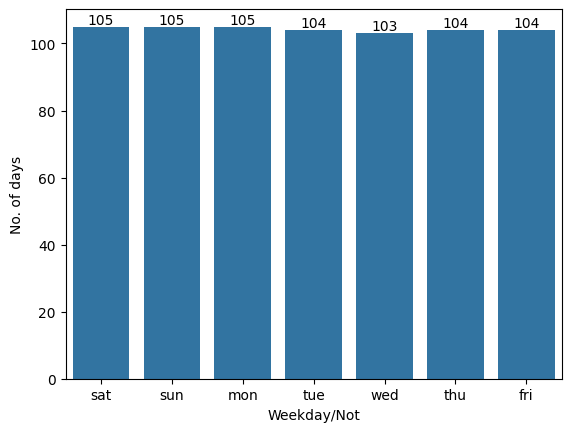

In [13]:
ax = sns.countplot(df, x=df['weekday'])
ax.bar_label(ax.containers[0]) 
plt.xlabel('Weekday/Not')
plt.ylabel('No. of days')
plt.show()

# Observations:
# 1. Range of No. of days along the week in the data set

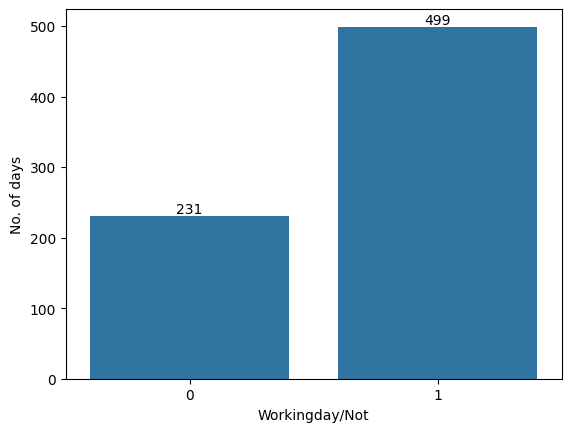

In [14]:
ax = sns.countplot(df, x=df['workingday'])
ax.bar_label(ax.containers[0]) 
plt.xlabel('Workingday/Not')
plt.ylabel('No. of days')
plt.show()

# Observations:
# 1. Combined column to indicate if it either a holiday or weekend - 231 non working days out of total 730 days

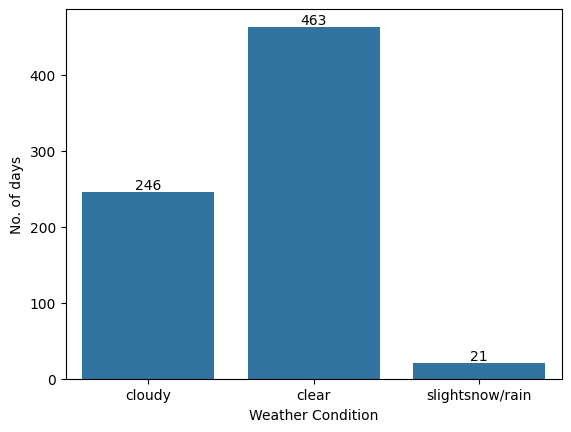

In [15]:
ax = sns.countplot(df, x=df['weathersit'])
ax.bar_label(ax.containers[0]) 
plt.xlabel('Weather Condition')
plt.ylabel('No. of days')
plt.show()

# Observations:
# Distribution of weather condition observed in the 2 years - Mostly it was clear or partly cloudy followed buy misty/cloudy and very less proportion of slight snow or rain 
#                                                           - heavy snow or rain was not observed in the 2 years

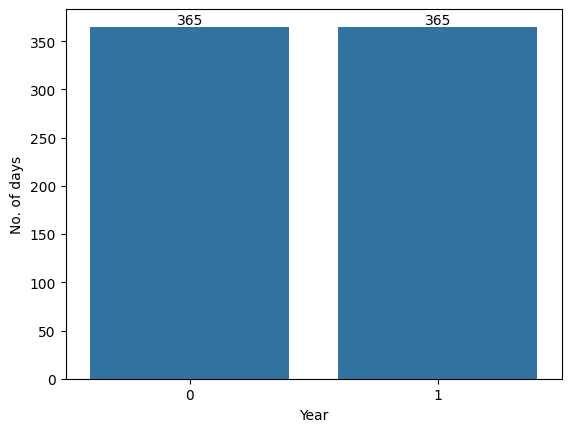

In [16]:
ax = sns.countplot(df, x=df['yr'])
ax.bar_label(ax.containers[0]) 
plt.xlabel('Year')
plt.ylabel('No. of days')
plt.show()

# Observations:
# 365 days of 2018 and 2019 is present in the data set

In [17]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [18]:
def distplot(df):
    num_columns = list(['temp', 'atemp', 'hum', 'windspeed'])
    for column in df.columns:
        if column in num_columns:
            sns.distplot(df[column])
            plt.show()

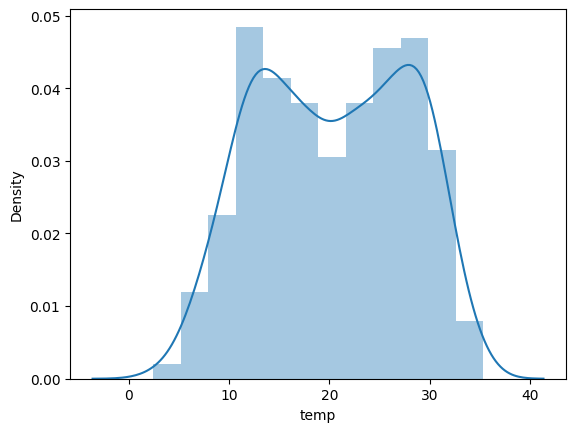

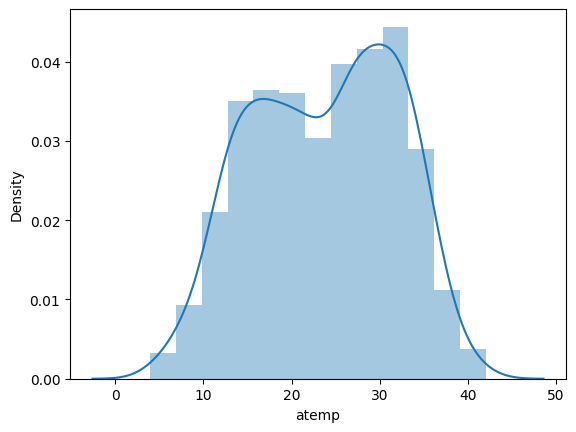

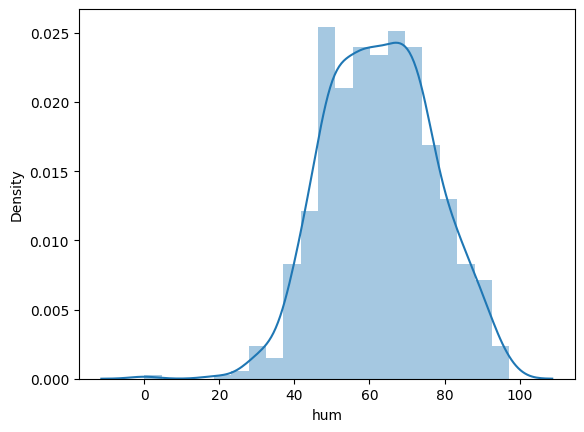

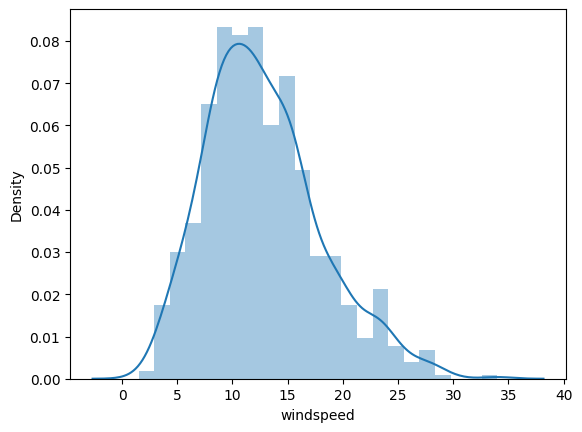

In [19]:
distplot(df)

In [20]:
def boxplot(df):
    num_columns = list(['temp', 'atemp', 'hum', 'windspeed'])
    for column in df.columns:
        if column in num_columns:
            sns.boxplot(df[column])
            plt.show()

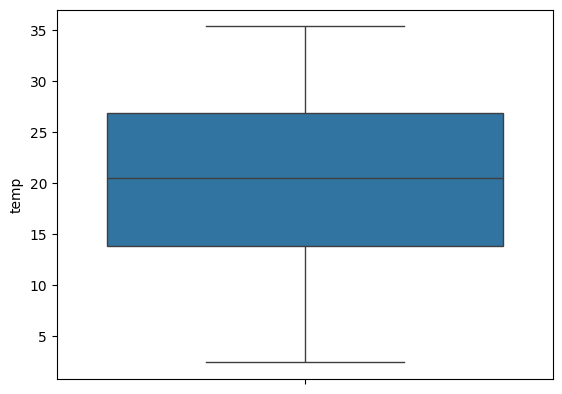

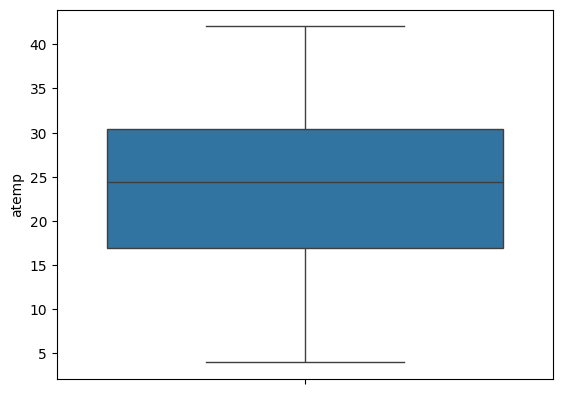

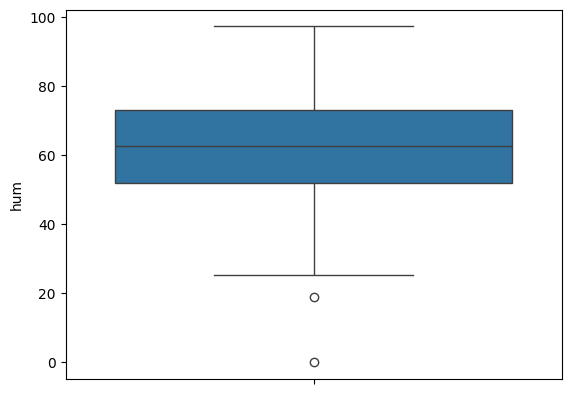

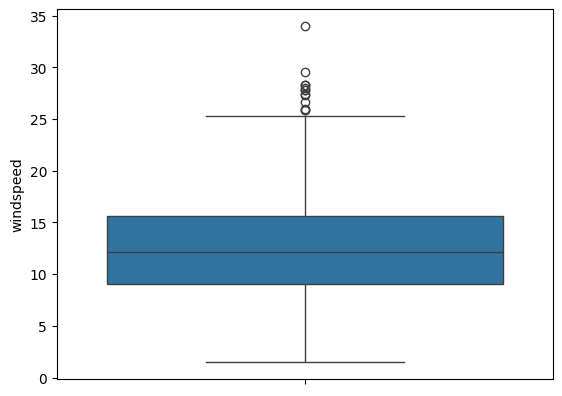

In [21]:
boxplot(df)

# Observations:
# 1. Temp seems to not have any extreme outliers in the dataset
# 2. Feeling Temperature also seems to not have any extreme outliers in the dataset
# 3. Humidity has 2 values as outliers below 20
# 4. Windspeed has a lot of outliers above the maximum value (Q3 + 1.5(QR))

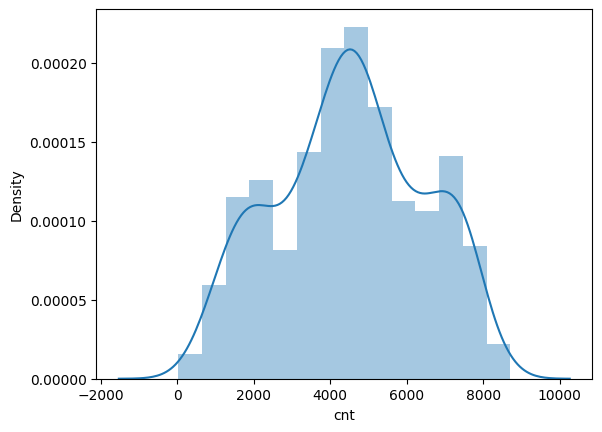

In [22]:
sns.distplot(df['cnt'])
plt.show()

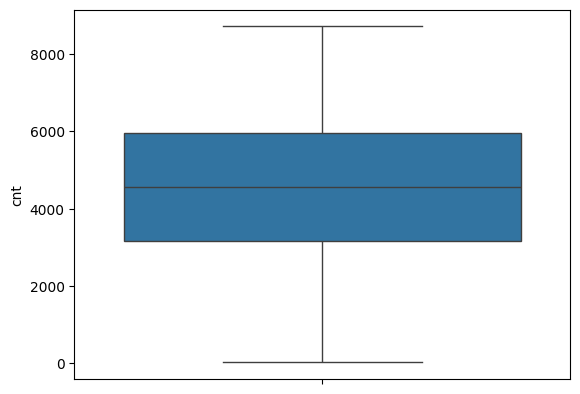

In [23]:
sns.boxplot(df['cnt'])
plt.show()

2. Bivariate Analysis

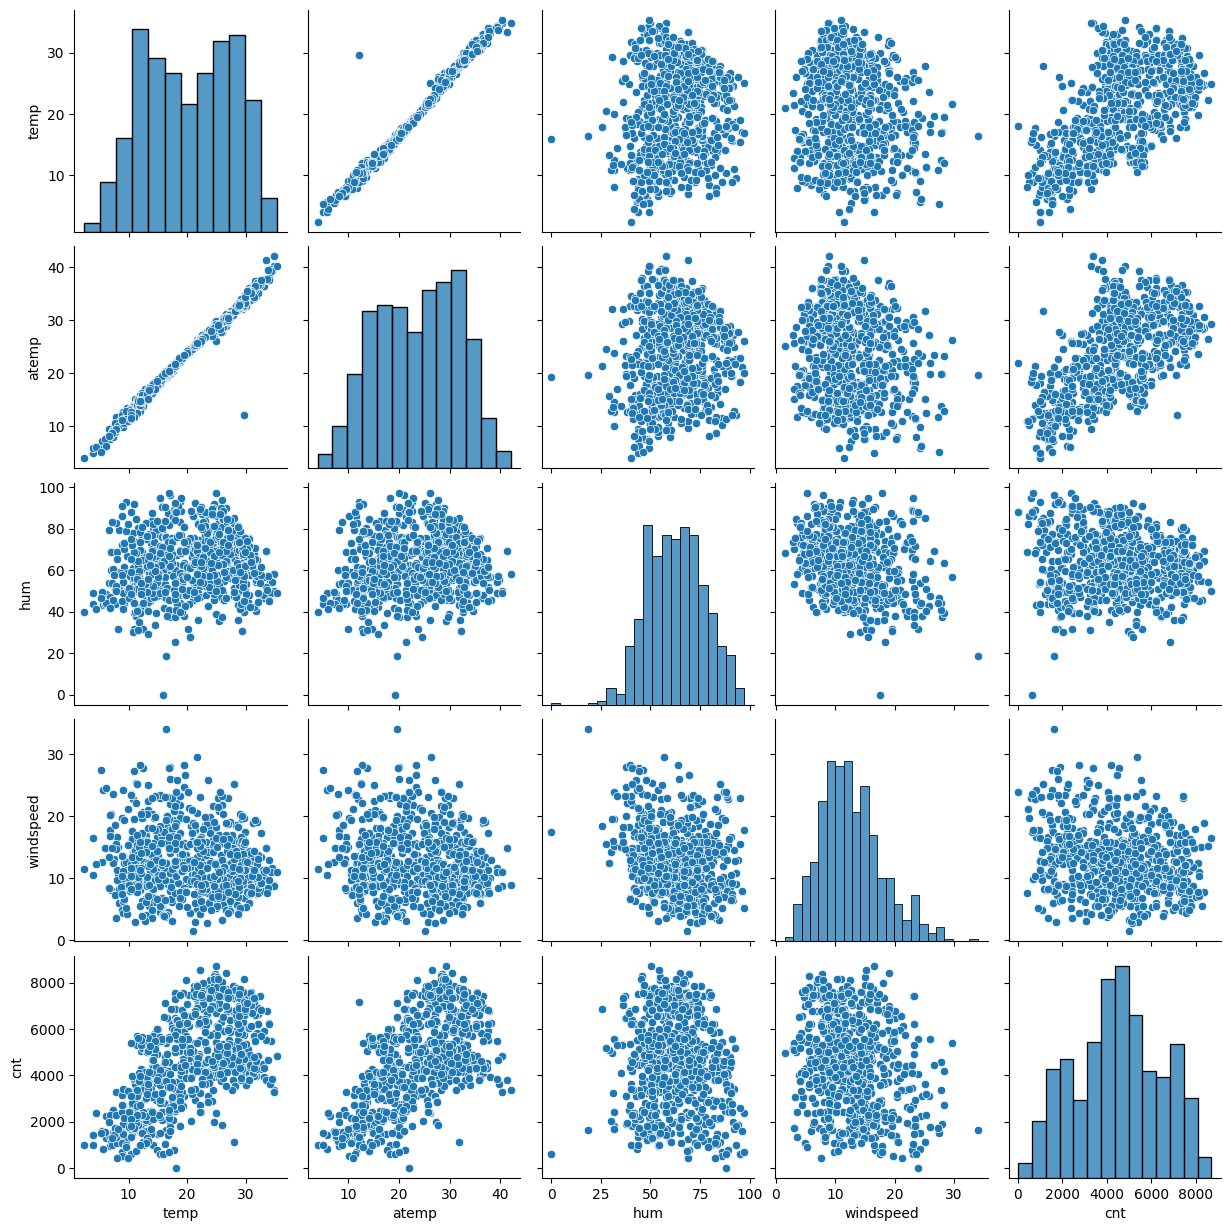

In [24]:
sns.pairplot(df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

# Observations:
# 1. Count of total rental bikes seems to show a strong positive correlation with Temperature, Feeling Temperature
# 2. Shows a little correlation with Humidoty and Windspeed as well

In [25]:
def catplot(df):
    cat_columns = list(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'])
    for column in df.columns:
        if column in cat_columns:
            sns.boxplot(y = df['cnt'], x = df[column])
            plt.ylabel('No. of Bike Rentals')
            plt.show()

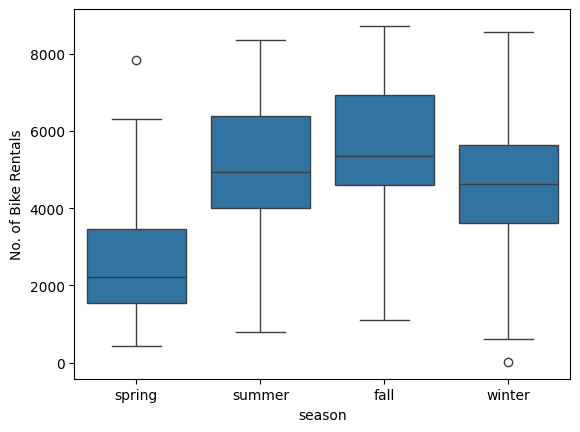

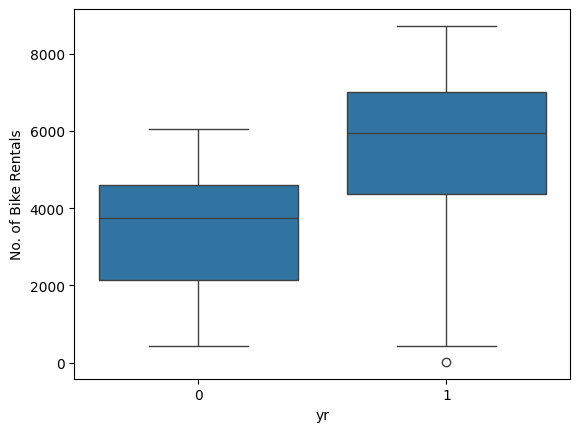

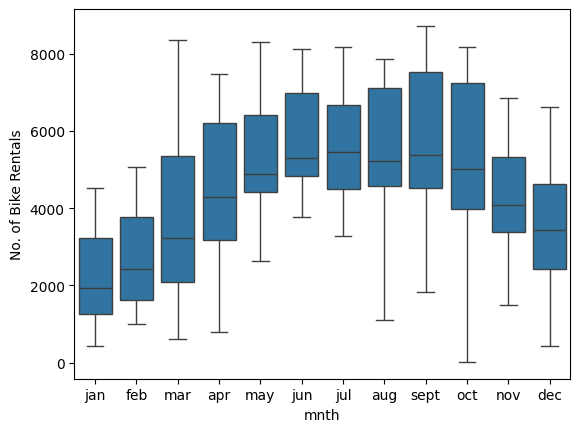

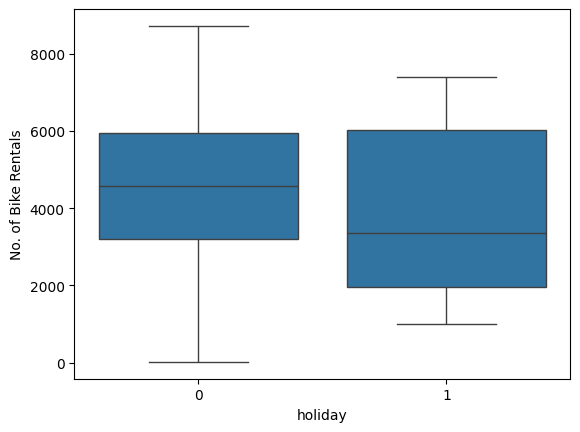

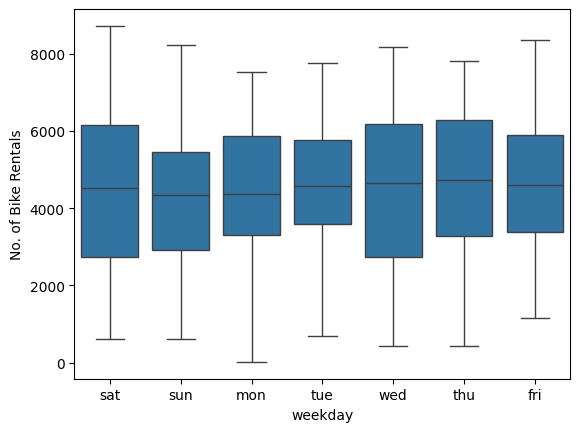

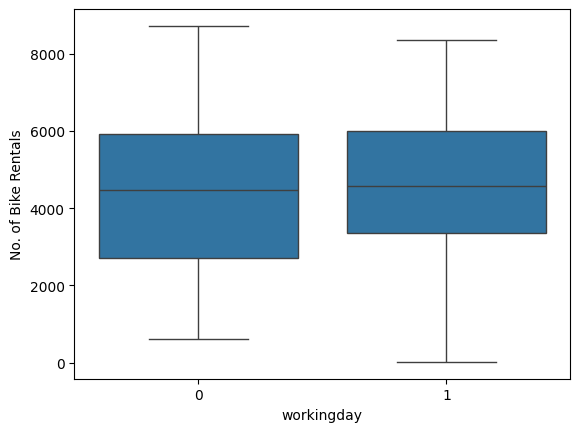

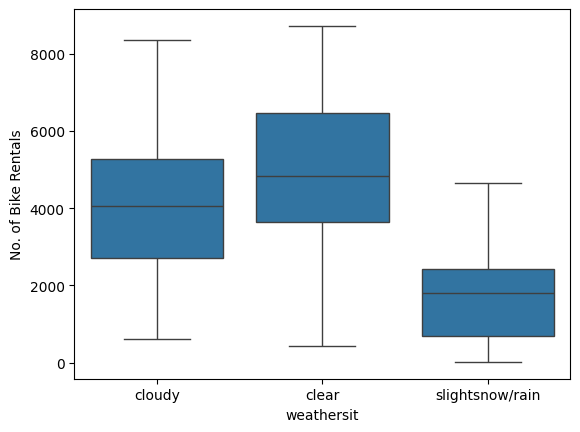

In [26]:
catplot(df)

# Observations:
# 1. cnt seems to be more in range for fall in the order fall > summer > winter(with one outlier on a partlicular day) > spring(with one outlier on a particular day)
# 2. cnt seems to be more in range in 2019 than in 2018
# 3. cnt is observed to be greater than 0 typically on a holiday and the range is closer than that on a non holiday
# 4. cnt is kind of in the same range on a working day or a non-working day
# 5. cnt is range is generally more on a cler/cloudy day then comes mist/cloudy followed by slight snow/rain day

In [27]:
df[['cnt', 'temp', 'atemp', 'hum', 'windspeed']].corr()

,cnt,temp,atemp,hum,windspeed
cnt,1.000000,0.627044,0.630685,-0.098543,-0.235132
temp,0.627044,1.000000,0.991696,0.128565,-0.158186
atemp,0.630685,0.991696,1.000000,0.141512,-0.183876
hum,-0.098543,0.128565,0.141512,1.000000,-0.248506
windspeed,-0.235132,-0.158186,-0.183876,-0.248506,1.000000


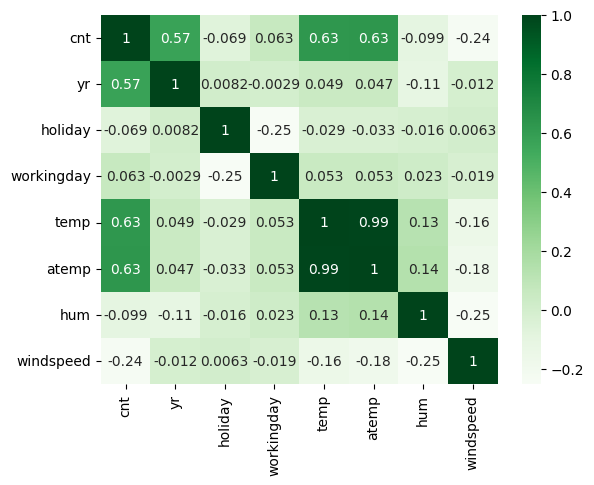

In [28]:
sns.heatmap(df[['cnt', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed']].corr(), cmap="Greens",annot=True)
plt.show()

Data Preparation

In [29]:
np.random.seed(42)
random.seed(42)

In [30]:
bike_df = pd.get_dummies(data=df, columns=['season', 'mnth', 'weekday'], drop_first=True, dtype=np.uint8)
bike_df = pd.get_dummies(data=bike_df, columns=['weathersit'], dtype=np.uint8)
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_cloudy,weathersit_slightsnow/rain
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,1,0,0


Train/Test Split

In [31]:
df_train, df_test = train_test_split(bike_df, test_size=0.3, random_state=42)
df_train.shape, df_test.shape

((511, 31), (219, 31))

In [32]:
y_train = df_train.pop('cnt')
y_test = df_test.pop('cnt')
X_train = df_train
X_test = df_test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((511, 30), (511,), (219, 30), (219,))

Scaling of Numerical variables

In [33]:
scaler = MinMaxScaler()
num_var = ['temp', 'atemp', 'hum', 'windspeed']
X_train[num_var] = scaler.fit_transform(X_train[num_var])
X_train[num_var].describe()

,temp,atemp,hum,windspeed
count,511.000000,511.000000,511.000000,511.000000
mean,0.550874,0.526518,0.654174,0.414873
std,0.227231,0.212976,0.143648,0.185619
min,0.000000,0.000000,0.000000,0.000000
25%,0.354221,0.353207,0.544598,0.281934
50%,0.575304,0.563297,0.659940,0.384732
75%,0.745079,0.698389,0.756977,0.526481
max,1.000000,1.000000,1.000000,1.000000


Performing RFE:

In [34]:
#Running RFE with the output number of variables = 15
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [36]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 4),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', True, 1),
 ('mnth_aug', False, 12),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 11),
 ('mnth_jan', False, 15),
 ('mnth_jul', False, 2),
 ('mnth_jun', False, 16),
 ('mnth_mar', False, 5),
 ('mnth_may', False, 6),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 7),
 ('mnth_sept', False, 3),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 13),
 ('weathersit_clear', True, 1),
 ('weathersit_cloudy', True, 1),
 ('weathersit_slightsnow/rain', True, 1)]

In [37]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_nov', 'weekday_sat',
       'weekday_sun', 'weathersit_clear', 'weathersit_cloudy',
       'weathersit_slightsnow/rain'],
      dtype='object')

Model 1:

In [38]:
# Function to calculate VIF

def VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [39]:
# Function to create OLS Model

def OLS(y_train, df):
    X_train_sm = sm.add_constant(df)
    lr = sm.OLS(y_train, X_train_sm)
    lr_model = lr.fit()
    print(lr_model.summary())

In [40]:
X_train_rfe = X_train[col]
OLS(y_train, X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     190.0
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          2.92e-183
Time:                        22:29:54   Log-Likelihood:                -4136.1
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     497   BIC:                             8360.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [41]:
VIF(X_train_rfe)

,Features,VIF
1,holiday,inf
2,workingday,inf
10,weekday_sat,inf
11,weekday_sun,inf
12,weathersit_clear,inf
13,weathersit_cloudy,inf
14,weathersit_slightsnow/rain,inf
3,atemp,3.07
6,season_spring,2.83
7,season_winter,2.17


Model 2: Dropping holiday as its coeff is -ve, has high p-value and has high VIF

In [42]:
X_train_rfe = X_train_rfe.drop('holiday', axis=1)
OLS(y_train, X_train_rfe)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     190.0
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          2.92e-183
Time:                        22:29:55   Log-Likelihood:                -4136.1
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     497   BIC:                             8360.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
11,weathersit_clear,69.29
12,weathersit_cloudy,45.27
1,workingday,8.54
10,weekday_sun,5.61
9,weekday_sat,5.60
13,weathersit_slightsnow/rain,5.41
2,atemp,3.07
5,season_spring,2.83
6,season_winter,2.17
3,hum,1.84


Model 2: Dropping weekday_sun since it has high P value > 0.05

In [43]:
X_train_rfe = X_train_rfe.drop('weekday_sun', axis=1)
OLS(y_train, X_train_rfe)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.4
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          5.07e-184
Time:                        22:29:56   Log-Likelihood:                -4137.1
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     498   BIC:                             8355.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
10,weathersit_clear,49.92
11,weathersit_cloudy,34.37
12,weathersit_slightsnow/rain,4.47
2,atemp,3.07
5,season_spring,2.83
6,season_winter,2.17
3,hum,1.84
8,mnth_nov,1.69
1,workingday,1.59
9,weekday_sat,1.58


P value seems to be good! We can experiment for more optimization

Model 4: Dropping weathersit_clear with high VIF

In [44]:
X_train_rfe = X_train_rfe.drop('weathersit_clear', axis=1)
OLS(y_train, X_train_rfe)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.4
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          5.07e-184
Time:                        22:29:56   Log-Likelihood:                -4137.1
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     498   BIC:                             8355.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
3,hum,24.26
2,atemp,15.54
4,windspeed,5.01
1,workingday,4.54
6,season_winter,2.70
5,season_spring,2.63
10,weathersit_cloudy,2.24
0,yr,2.09
8,mnth_nov,1.80
9,weekday_sat,1.78


In [45]:
X_train_rfe = X_train_rfe.drop('hum', axis=1)
OLS(y_train, X_train_rfe)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.6
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          8.24e-183
Time:                        22:29:56   Log-Likelihood:                -4142.7
No. Observations:                 511   AIC:                             8309.
Df Residuals:                     499   BIC:                             8360.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
2,atemp,6.06
3,windspeed,4.96
1,workingday,4.45
5,season_winter,2.34
0,yr,2.09
4,season_spring,1.82
7,mnth_nov,1.77
8,weekday_sat,1.75
9,weathersit_cloudy,1.56
6,mnth_dec,1.31


Comparing two models having atemp or windspeed and not the other since temp can seems to be an influencial parameter to not be let out of the model

In [46]:
X_train_rfe_1 = X_train_rfe.copy()
X_train_rfe_1.drop("windspeed",inplace=True,axis='columns')
OLS(y_train, X_train_rfe_1)
VIF(X_train_rfe_1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     234.0
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          1.95e-181
Time:                        22:29:56   Log-Likelihood:                -4148.8
No. Observations:                 511   AIC:                             8320.
Df Residuals:                     500   BIC:                             8366.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
2,atemp,4.75
1,workingday,4.36
4,season_winter,2.33
0,yr,2.07
6,mnth_nov,1.74
7,weekday_sat,1.70
8,weathersit_cloudy,1.54
3,season_spring,1.47
5,mnth_dec,1.31
9,weathersit_slightsnow/rain,1.07


In [47]:
X_train_rfe_1 = X_train_rfe.copy()
X_train_rfe_1.drop("atemp",inplace=True,axis='columns')
OLS(y_train, X_train_rfe_1)
VIF(X_train_rfe_1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     181.6
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          2.20e-159
Time:                        22:29:57   Log-Likelihood:                -4200.9
No. Observations:                 511   AIC:                             8424.
Df Residuals:                     500   BIC:                             8470.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
2,windspeed,3.89
1,workingday,3.02
4,season_winter,2.34
0,yr,1.93
6,mnth_nov,1.73
8,weathersit_cloudy,1.54
7,weekday_sat,1.51
3,season_spring,1.49
5,mnth_dec,1.30
9,weathersit_slightsnow/rain,1.09


Model with atemp and without windspeed has greater R2 value hence chossing that model and proceeding

In [48]:
X_train_rfe = X_train_rfe.drop('windspeed', axis=1)
OLS(y_train, X_train_rfe)
VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     234.0
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          1.95e-181
Time:                        22:29:57   Log-Likelihood:                -4148.8
No. Observations:                 511   AIC:                             8320.
Df Residuals:                     500   BIC:                             8366.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
2,atemp,4.75
1,workingday,4.36
4,season_winter,2.33
0,yr,2.07
6,mnth_nov,1.74
7,weekday_sat,1.70
8,weathersit_cloudy,1.54
3,season_spring,1.47
5,mnth_dec,1.31
9,weathersit_slightsnow/rain,1.07


This model seems to be good with low dependency amongst itself p-values<0.05 for all the independent variables. Furthermore it has F-stat value which is 234 > 0 and P(F-stat) is very close to 0 which implies that the model is significant


Also the R-square value and adjusted R-square value is 82.4% and 82.0% which also seems to be good

In [49]:
#add constant
X_train_sm = sm.add_constant(X_train_rfe)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit the model
lr_model = lr.fit()

print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     234.0
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          1.95e-181
Time:                        22:29:57   Log-Likelihood:                -4148.8
No. Observations:                 511   AIC:                             8320.
Df Residuals:                     500   BIC:                             8366.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [50]:
lr_model.params

const                         1830.971171
yr                            2007.764465
workingday                     422.877162
atemp                         3507.983201
season_spring                -1304.115717
season_winter                  809.844989
mnth_dec                      -652.573108
mnth_nov                      -821.498618
weekday_sat                    446.398278
weathersit_cloudy             -662.134903
weathersit_slightsnow/rain   -2341.589759
dtype: float64

In [51]:
y_train_pred = lr_model.predict(X_train_sm)

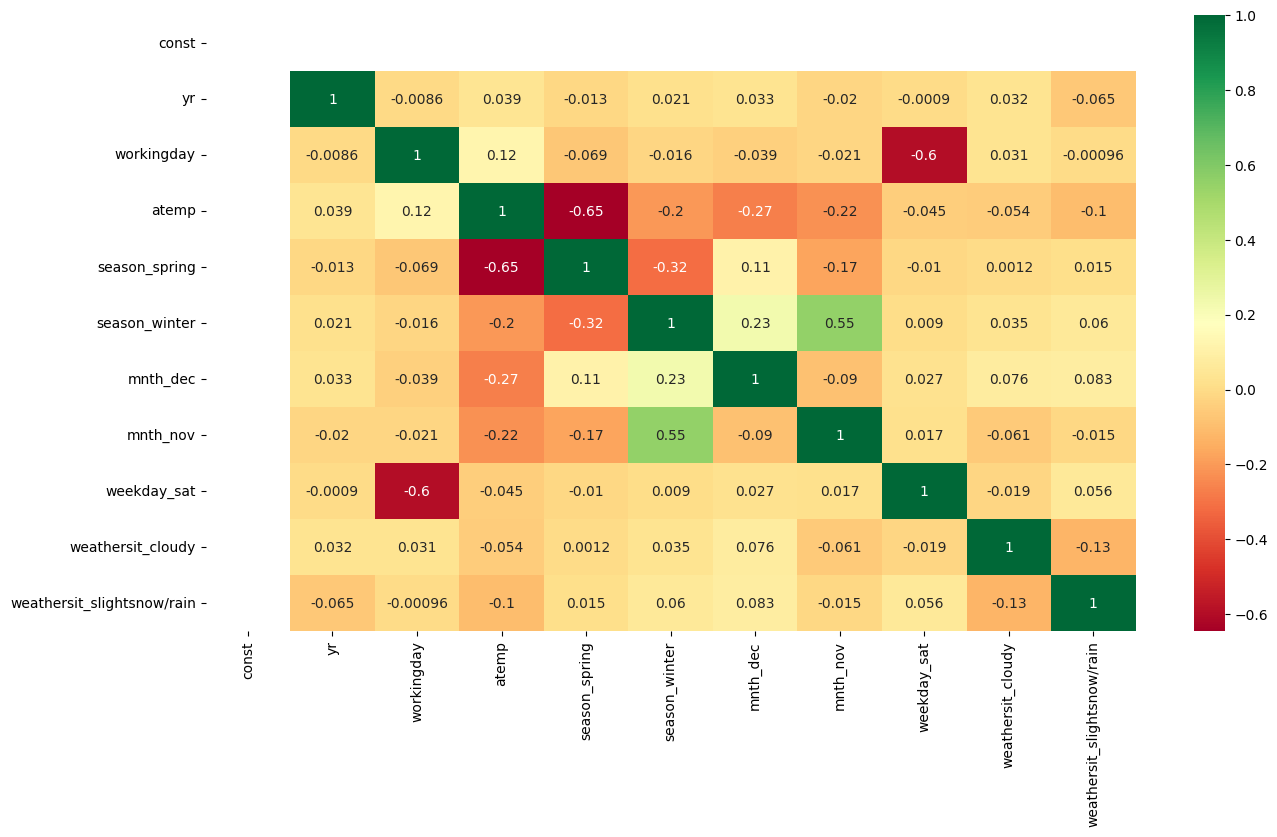

In [52]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_sm.corr(),annot = True, cmap="RdYlGn")
plt.show()

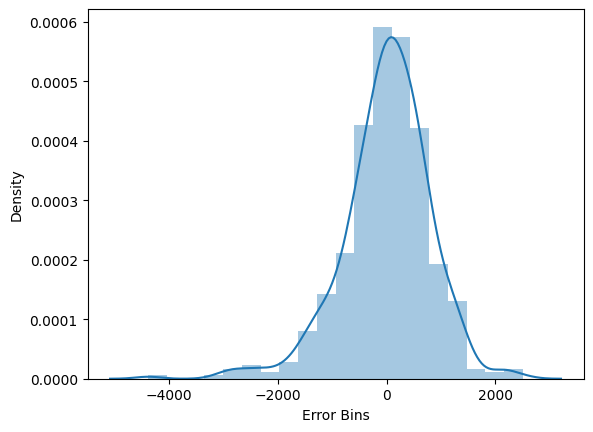

In [53]:
#Checking Normality
sns.distplot((y_train - y_train_pred), bins=20)
plt.xlabel('Error Bins')
plt.show()

# Observation:
# Normal Distribution observed for residuals

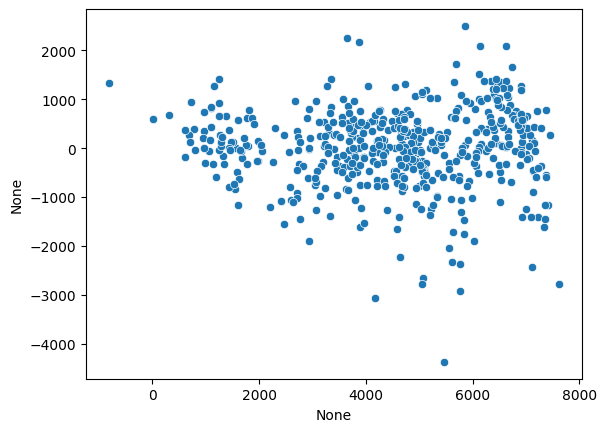

In [54]:
# Homoscedasticity check (There should be no visible pattern in residual values.)
sns.scatterplot(x=y_train_pred,y=(y_train - y_train_pred))
plt.show()

In [55]:
r2_score(y_train, y_train_pred)

0.8239723083677146

Predictions using Final Model

In [56]:
#Scaling Test data

num_var = ['temp', 'atemp', 'hum', 'windspeed']
X_test[num_var] = scaler.transform(X_test[num_var])

In [57]:
col = X_train_rfe.columns
X_test_sm = sm.add_constant(X_test[col])

In [58]:
X_test_sm.describe()

,const,yr,workingday,atemp,season_spring,season_winter,mnth_dec,mnth_nov,weekday_sat,weathersit_cloudy,weathersit_slightsnow/rain
count,219.0,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,1.0,0.452055,0.716895,0.501760,0.283105,0.228311,0.109589,0.059361,0.127854,0.315068,0.027397
std,0.0,0.498836,0.451539,0.215759,0.451539,0.420705,0.313092,0.236840,0.334692,0.465607,0.163612
min,1.0,0.000000,0.000000,0.051010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.314694,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,1.000000,0.496145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,1.000000,1.000000,0.685028,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.0,1.000000,1.000000,0.939531,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
y_test_pred = lr_model.predict(X_test_sm)

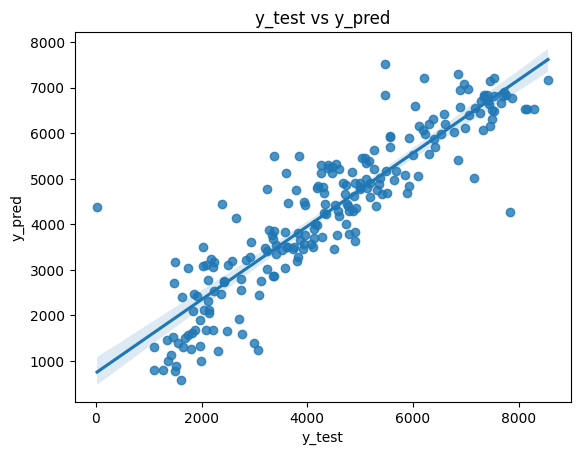

In [60]:
sns.regplot(x=y_test,y=y_test_pred,fit_reg=True)
plt.title('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [61]:
# calculating the r2 score for both training dataset and testing dataset
print('r2 for training data set: ',r2_score(y_true=y_train,y_pred=y_train_pred))
print('r2 for testing data set: ',r2_score(y_true=y_test,y_pred=y_test_pred))

r2 for training data set:  0.8239723083677146
r2 for testing data set:  0.8079712260488895


In [62]:
# final model params
lr_model.params

const                         1830.971171
yr                            2007.764465
workingday                     422.877162
atemp                         3507.983201
season_spring                -1304.115717
season_winter                  809.844989
mnth_dec                      -652.573108
mnth_nov                      -821.498618
weekday_sat                    446.398278
weathersit_cloudy             -662.134903
weathersit_slightsnow/rain   -2341.589759
dtype: float64

Final Linear Regression Equation:

cnt = yr*2007.764465 + workingday*422.877162 + atemp*3507.983201 + season_spring*-1304.115717 + season_winter*809.844989 + mnth_dec*-652.573108 + mnth_nov*-821.498618
      weekday_sat*446.398278 + weathersit_cloudy*-662.134903 + weathersit_slightsnow/rain*-2341.589759 + 1830.971171